In [2]:
"""
Linear Regression with TensorFlow
sungjoon.choi@cpslab.snu.ac.kr
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
print ("Packages Loaded")

Packages Loaded



 Type of 'train_X' is  <class 'numpy.ndarray'>
 Shape of 'train_X' is (1, 20)
 Type of 'train_Y' is  <class 'numpy.ndarray'>
 Shape of 'train_Y' is (1, 20)


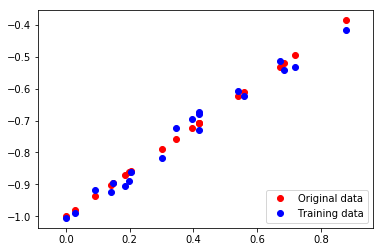

In [3]:
# Generate training data
np.random.seed(1)
def f(x, a, b):
    n    = train_X.size
    vals = np.zeros((1, n))
    for i in range(0, n):
        ax  = np.multiply(a, x.item(i))
        val = np.add(ax, b)
        vals[0, i] = val
    return vals

Wref = 0.7
bref = -1.
n    = 20
noise_var = 0.001
train_X   = np.random.random((1, n))
ref_Y     = f(train_X, Wref, bref)
train_Y   = ref_Y + np.sqrt(noise_var)*np.random.randn(1, n)##加入随机噪声
n_samples = train_X.size # <= Just for using size operator 
print ("")
print (" Type of 'train_X' is ", type(train_X))
print (" Shape of 'train_X' is %s" % (train_X.shape,))
print (" Type of 'train_Y' is ", type(train_Y))
print (" Shape of 'train_Y' is %s" % (train_Y.shape,))

# Plot
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.axis('equal')
plt.legend(loc='lower right')

In [4]:
np.random.random((1, n))

array([[0.49157316, 0.05336255, 0.57411761, 0.14672857, 0.58930554,
        0.69975836, 0.10233443, 0.41405599, 0.69440016, 0.41417927,
        0.04995346, 0.53589641, 0.66379465, 0.51488911, 0.94459476,
        0.58655504, 0.90340192, 0.1374747 , 0.13927635, 0.80739129]])

In [8]:
# Prepare for Linear Regression

# Parameters 
training_epochs = 2000
display_step    = 50


# Set TensorFlow Graph
X = tf.placeholder(tf.float32, name="input")
Y = tf.placeholder(tf.float32, name="output")
W = tf.Variable(np.random.randn(), name="weight")##产生正太分布随机数
b = tf.Variable(np.random.randn(), name="bias")

# Construct a Model
activation = tf.add(tf.multiply(X, W), b)

# Define Error Measure and Optimizer
learning_rate   = 0.01
cost = tf.reduce_mean(tf.pow(activation-Y, 2))
# learning_rate   = 0.001
# cost = tf.sqrt(tf.reduce_sum(tf.pow(activation-Y, 2)))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

"""
 tf.reduce_sum()
 tf.reduce_mean()
 _____

 tf.pow(Yhat, Y, 2)
 tf.nn.softmax_cross_entropy_with_logits(Yhat, Y)
 _____

 tf.train.GradientDescentOptimizer(0.05).minimize(cost)
 tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
"""

# Initializer
init = tf.initialize_all_variables()

In [9]:
# Run! 
sess = tf.Session()
# Initialize
sess.run(init)    
for epoch in range(training_epochs):
    for (x, y) in zip(train_X[0, :], train_Y[0, :]):
        # print "x: ", x, " y: ", y
        sess.run(optimizer, feed_dict={X:x, Y:y})
    
    # Check cost
    if epoch % display_step == 0:
        costval = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print ("Epoch:", "%04d"%(epoch+1), "cost=", "{:.5f}".format(costval))
        Wtemp = sess.run(W)##执行run输出参数
        btemp = sess.run(b)##执行run输出参数
        print (" Wtemp is", "{:.4f}".format(Wtemp), "btemp is", "{:.4f}".format(btemp))
        print (" Wref is", "{:.4f}".format(Wref), "bref is", "{:.4f}".format(bref))##与原始定义的拟合系数进行比较
        
# Final W and b
Wopt = sess.run(W)
bopt = sess.run(b)
fopt = f(train_X, Wopt, bopt)

Epoch: 0001 cost= 1.23414
 Wtemp is 0.0922 btemp is 0.3209
 Wref is 0.7000 bref is -1.0000


Epoch: 0051 cost= 0.00748
 Wtemp is 0.3502 btemp is -0.8676
 Wref is 0.7000 bref is -1.0000


Epoch: 0101 cost= 0.00145
 Wtemp is 0.5700 btemp is -0.9536
 Wref is 0.7000 bref is -1.0000


Epoch: 0151 cost= 0.00068
 Wtemp is 0.6478 btemp is -0.9840
 Wref is 0.7000 bref is -1.0000


Epoch: 0201 cost= 0.00058
 Wtemp is 0.6754 btemp is -0.9948
 Wref is 0.7000 bref is -1.0000


Epoch: 0251 cost= 0.00057
 Wtemp is 0.6852 btemp is -0.9986
 Wref is 0.7000 bref is -1.0000


Epoch: 0301 cost= 0.00056
 Wtemp is 0.6886 btemp is -1.0000
 Wref is 0.7000 bref is -1.0000


Epoch: 0351 cost= 0.00056
 Wtemp is 0.6898 btemp is -1.0004
 Wref is 0.7000 bref is -1.0000


Epoch: 0401 cost= 0.00056
 Wtemp is 0.6903 btemp is -1.0006
 Wref is 0.7000 bref is -1.0000


Epoch: 0451 cost= 0.00056
 Wtemp is 0.6904 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 0501 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 0551 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 0601 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 0651 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 0701 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 0751 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 0801 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 0851 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 0901 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 0951 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1001 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1051 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1101 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1151 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1201 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1251 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1301 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1351 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1401 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1451 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1501 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1551 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1601 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1651 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1701 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1751 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1801 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1851 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1901 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


Epoch: 1951 cost= 0.00056
 Wtemp is 0.6905 btemp is -1.0007
 Wref is 0.7000 bref is -1.0000


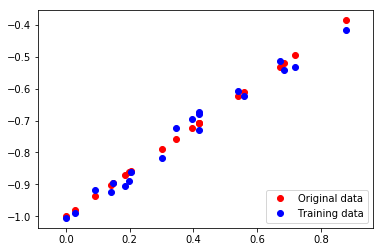

In [10]:
# Plot Results
plt.figure(2)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.plot(train_X[0, :], fopt[0, :], 'k-', label='Fitted Line')
plt.axis('equal')
plt.legend(loc='lower right')